In [94]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [95]:
import nltk
from nltk.corpus import twitter_samples

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [96]:
nltk.download('twitter_samples')

[nltk_data] Downloading package twitter_samples to
[nltk_data]     /Users/adityahegde/nltk_data...
[nltk_data]   Package twitter_samples is already up-to-date!


True

In [97]:
import re
import string

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer
from nltk.tokenize import TweetTokenizer

In [98]:
pos_tweets = twitter_samples.strings('positive_tweets.json')
neg_tweets = twitter_samples.strings('negative_tweets.json')

tweets = pos_tweets + neg_tweets

In [99]:
lables = np.append(np.ones((len(pos_tweets))), np.zeros(len(neg_tweets)))

In [100]:
test_pos = pos_tweets[4000:]
train_pos = pos_tweets[:4000]
test_neg = neg_tweets[4000:]
train_neg = neg_tweets[:4000]

train_x = train_pos + train_neg
test_x = test_neg + test_neg

In [101]:
train_y = np.append(np.ones((len(train_pos), 1)), np.zeros((len(train_neg), 1)), axis=0)
test_y = np.append(np.ones((len(test_pos), 1)), np.zeros((len(test_neg), 1)), axis=0)

In [102]:
print(f"train y shape {train_y.shape}")
print(f"test y shape {test_y.shape}")

train y shape (8000, 1)
test y shape (2000, 1)


In [103]:
def preprocess_tweet(tweet):
    stemmer = PorterStemmer()
    stopwords_eng = stopwords.words('english')

    tweet = re.sub(r'\$\w*', '', tweet)
    tweet = re.sub(r'^RT[\s]+', '', tweet)

    tweet = re.sub(r'https?:\/\/.*[\r\n]*', '', tweet)

    tweet = re.sub(r'#', '', tweet)

    # tokneize the tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True, reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_eng) and (word not in string.punctuation):
            stem_word = stemmer.stem(word)
            tweets_clean.append(stem_word)

    return tweets_clean

In [104]:
def build_freq(tweets, ys):
    ylist = np.squeeze(ys).tolist()

    freqs = {}
    # mapping each (word, sentiment) pair to its frequency
    for y, tweet in zip(ylist, tweets):
        for word in preprocess_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1
    return freqs

In [105]:
freqs = build_freq(tweets, lables)

# check datatype
print(f'type(freqs) = {type(freqs)}')

print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 13065


In [106]:
keys = ['happi', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        '❤', ':)', ':(', '😒', '😬', '😄', '😍', '♛',
        'song', 'idea', 'power', 'play', 'magnific']

data = []

for word in keys:
    pos = 0
    neg = 0
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]
    
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    data.append([word, pos, neg])

data

[['happi', 211, 25],
 ['merri', 1, 0],
 ['nice', 98, 19],
 ['good', 238, 101],
 ['bad', 18, 73],
 ['sad', 5, 123],
 ['mad', 4, 11],
 ['best', 65, 22],
 ['pretti', 20, 15],
 ['❤', 29, 21],
 [':)', 3568, 2],
 [':(', 1, 4571],
 ['😒', 1, 3],
 ['😬', 0, 2],
 ['😄', 5, 1],
 ['😍', 2, 1],
 ['♛', 0, 210],
 ['song', 22, 27],
 ['idea', 26, 10],
 ['power', 7, 6],
 ['play', 46, 48],
 ['magnific', 2, 0]]

/opt/homebrew/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 128556 (\N{GRIMACING FACE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


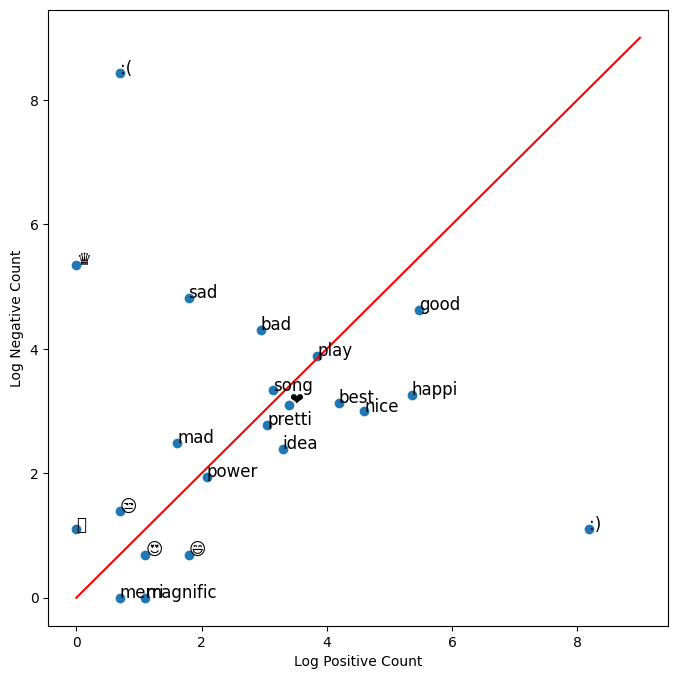

In [107]:
fig, ax = plt.subplots(figsize = (8, 8))

x = np.log([x[1] + 1 for x in data])
y = np.log([x[2] +  1 for x in data])

ax.scatter(x, y)

plt.xlabel('Log Positive Count')
plt.ylabel('Log Negative Count')

for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=12)

ax.plot([0, 9], [0, 9], color='red')
plt.show()

In [108]:
freqs = build_freq(train_X, train_y)

print("type(freqs) =", str(type(freqs)))
print("len(freqs) =", str(len(freqs.keys())))

type(freqs) = <class 'dict'>
len(freqs) = 11337


In [109]:
print("Positive tweet example \n", train_x[0])
print("Preprossed positive tweet", preprocess_tweet(train_x[0]))

Positive tweet example 
 #FollowFriday @France_Inte @PKuchly57 @Milipol_Paris for being top engaged members in my community this week :)
Preprossed positive tweet ['followfriday', 'top', 'engag', 'member', 'commun', 'week', ':)']


In [110]:
def sigmoid(z): 

    h = 1/(1+np.exp(-z))
   
    return h

In [111]:
def gradientDescent(x, y, theta, alpha, num_iters):
   
    m = x.shape[0]
    
    for i in range(0, num_iters):
        
        # get z, the dot product of x and theta
        z = np.dot(x,theta)
        
        # get the sigmoid of z
        h = sigmoid(z)
        
        # calculate the cost function
        J = -(np.dot(y.T,np.log(h))+np.dot((1-y).T,np.log(1-h)))/m

        # update the weights theta
        theta = theta - alpha*(np.dot(x.T,h-y))/m
        
    J = float(J)
    return J, theta

In [112]:
def extract_features(tweet, freqs):
    
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = preprocess_tweet(tweet)
    
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3)) 
    
    #bias term is set to 1
    x[0,0] = 1 
       
    # loop through each word in the list of words
    for word in word_l:
         
        if (word,1.0) in freqs:
            # increment the word count for the positive label 1
            x[0,1] += freqs[(word,1.0)]
        if(word,0.0) in freqs:
            # increment the word count for the negative label 0
            x[0,2] += freqs[(word,0.0)]
        
    return x

In [113]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
Y = train_y

print(X.shape)
print(Y.shape)

(8000, 3)
(8000, 1)


In [114]:
# Apply gradient descent
J, theta = gradientDescent(X, Y, np.zeros((3, 1)), 1e-9, 1500)

print(f"The cost after training is {J:.6f}.")
print(f"The resulting vector of weights is {[round(t, 8) for t in np.squeeze(theta)]}")

The cost after training is 0.242155.
The resulting vector of weights is [7e-08, 0.00052391, -0.00055517]


Text(0, 0.5, 'Negative')

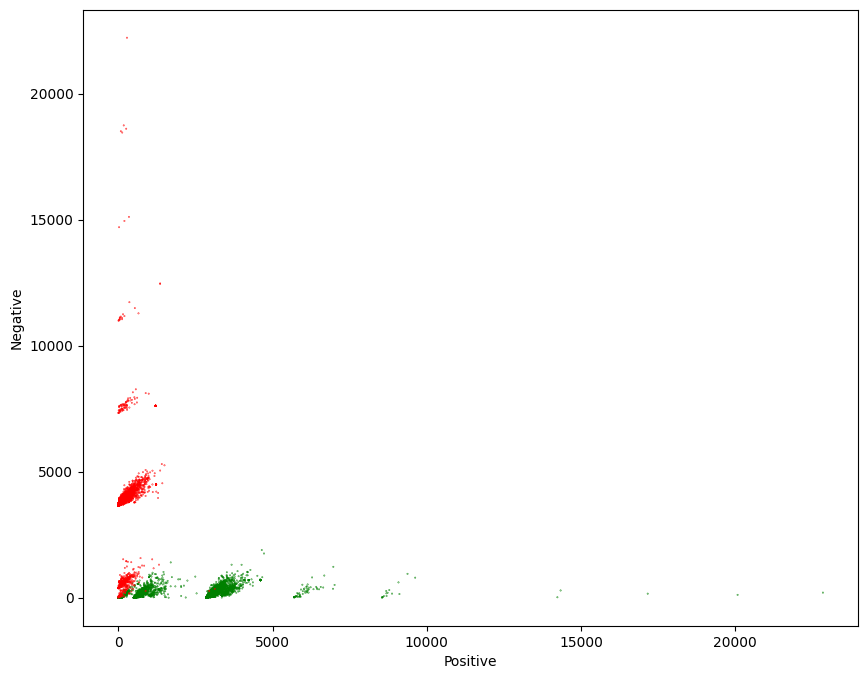

In [115]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'green']

# Color based on sentiment Y
ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s=0.1)

# Plot a dot for each pair of words
plt.xlabel("Positive")
plt.ylabel("Negative")

In [116]:
# Equation for the separation palne
def neg(theta, pos):
    return (-theta[0] - pos * theta[1]) / theta[2]

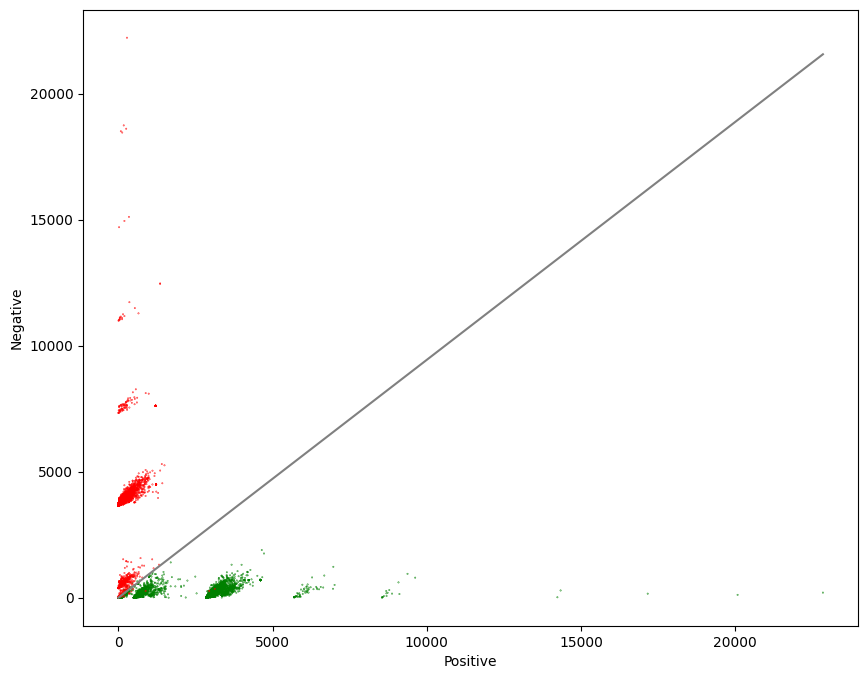

In [117]:
fig, ax = plt.subplots(figsize=(10, 8))

colors = ['red', 'green']

ax.scatter(X[:,1], X[:,2], c=[colors[int(k)] for k in Y], s=0.1)

plt.xlabel('Positive')
plt.ylabel('Negative')

# represents the logistic regression model in this chart
maxpos = np.max(X[:,1]) # max value in x axis

# Plot a gray line that divides the 2 areas

ax.plot([0, maxpos], [neg(theta, 0), neg(theta, maxpos)], color='gray')

plt.show()

In [118]:
def predict_tweet(tweet, freqs, theta):
    #  extract features from the tweet and store it in x var
    # the output of extract tweets is a 1x3 array
    x = extract_features(tweet, freqs)

    # make the predicution using x and theta
    y_pred = sigmoid(np.dot(x, theta))

    return y_pred

In [119]:
# Check your own sentiment
post = "I love machine learning :)"
y_pred_temp = predict_tweet(post, freqs, theta)
print(y_pred_temp)

if y_pred_temp > 0.5:
    print("Positive Post")
else:
    print("Negative Post")

[[0.83158609]]
Positive Post


In [120]:
def test_logistic_regression(test_x, test_y, freqs, theta):
    """ 
    test_x: a list of tweets
    test_y: (m, 1) vector with the corresponding labels for the list of tweets
    """
    
    y_hat = []
    
    for tweet in test_x:
        # get the label prediction for the tweet
        y_pred = predict_tweet(tweet, freqs, theta)
        
        if y_pred > 0.5:
            y_hat.append(1.0)
        else:
            y_hat.append(0.0)

    accuracy = np.sum(np.squeeze(test_y) == np.squeeze(np.asarray(y_hat)))/len(test_y)

    return accuracy

In [121]:
test_accuracy = test_logistic_regression(test_x, test_y, freqs, theta)
print(f"Logistic regression model's accuracy = {test_accuracy:.4f}")

Logistic regression model's accuracy = 0.5000
